In [1]:
# ! pip install mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
df1 = df.loc[:, 'Sixth Sense': 'Green Mile']
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


### Using 5 % support and 60 % threshold with metric as "Lift"

In [8]:
freq_item1= apriori(df=df1, min_support= 0.05 , use_colnames= True)
freq_item1.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [9]:
freq_item1.shape

(53, 2)

In [10]:
rule1= association_rules(df=freq_item1, metric="lift", min_threshold=0.6)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Harry Potter1, LOTR1, Green Mile, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [11]:
rule1.sort_values("lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
186,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
197,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
225,"(LOTR1, Green Mile, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
139,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
215,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
64,"(LOTR1, LOTR2)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000
21,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
52,"(Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
57,(Gladiator),"(Green Mile, Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333


In [12]:
rule1[(rule1["lift"]>6) & (rule1["confidence"]> 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
109,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
139,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
141,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
144,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
146,(LOTR),"(Green Mile, Sixth Sense, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
154,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
158,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
159,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [13]:
rule1[(rule1["lift"]>6) & (rule1["confidence"]> 0.9)].shape

(42, 9)

array([[<AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'confidence'}>, <AxesSubplot:>]],
      dtype=object)

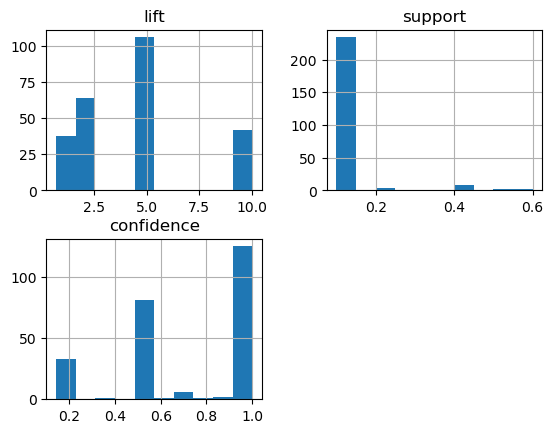

In [14]:
rule1[["lift", "support" , "confidence"]].hist()

<AxesSubplot:xlabel='support', ylabel='confidence'>

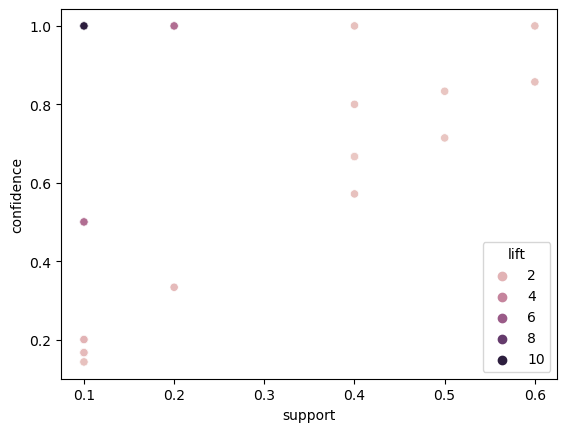

In [15]:
sns.scatterplot(data=rule1, x="support", y="confidence", hue= "lift")

### Using 10 % support and 70% threshold & metric as "Lift

In [18]:
freq_item2 = apriori(df=df1, min_support= 0.1, use_colnames= True)
freq_item2.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [19]:
freq_item2.shape

(53, 2)

In [20]:
rule2= association_rules(df=freq_item2, metric= "lift", min_threshold=0.7)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(Harry Potter1, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Harry Potter1, LOTR1, Green Mile, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [21]:
rule2.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
186,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
197,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
225,"(LOTR1, Green Mile, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
139,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
215,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
64,"(LOTR1, LOTR2)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000
21,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
52,"(Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
57,(Gladiator),"(Green Mile, Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333


<AxesSubplot:xlabel='support', ylabel='confidence'>

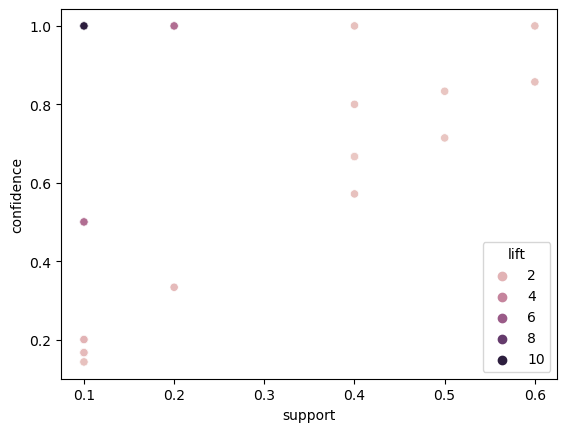

In [22]:
sns.scatterplot(data=rule2, x="support", y="confidence", hue= "lift")

array([[<AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'confidence'}>, <AxesSubplot:>]],
      dtype=object)

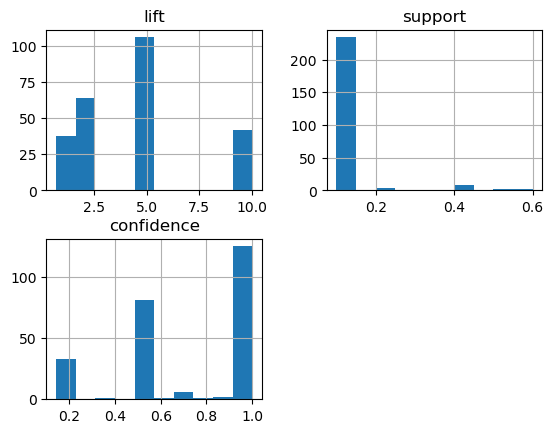

In [23]:
rule2[["lift", "support" , "confidence"]].hist()

### Using 5 % support and 60 % threshold and metric as "Confidence"

In [24]:
freq_item3= apriori(df=df1, min_support=0.05, use_colnames=True)
freq_item3.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [25]:
freq_item3.shape

(53, 2)

In [26]:
rule3= association_rules(df=freq_item3, metric="confidence", min_threshold=0.6)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, Sixth Sense)","(LOTR1, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [27]:
rule3.sort_values("lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
133,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
110,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
108,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
106,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
46,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
16,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
19,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [28]:
rule3[(rule3["lift"]>6) & (rule3["confidence"]> 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
47,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
61,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
63,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
65,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
66,(LOTR),"(Green Mile, Sixth Sense, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
71,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
72,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
74,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
75,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


array([[<AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'confidence'}>, <AxesSubplot:>]],
      dtype=object)

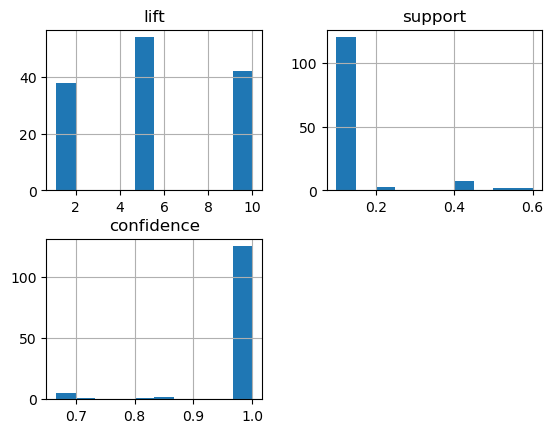

In [29]:
rule3[["lift", "support" , "confidence"]].hist()